# 3D Annotation of a given molecule 

## Introduction
When working with computational chemistry files, it is sometimes desired to visualize the working molecule and annotate specific features. 
## Dependencies

1. NumPy
2. IOData 
3. IPython`s Image module, optional, used to display example image only. 


In [19]:
import numpy as np 

import iodata
from iodata import load_one, dump_one 

from IPython.display import Image


## Opening of Input File 

We need to establish a means to opening our `fchk` file, and then obtaining our desired information, aptly named `workingBFactor`. This is accomplished using the `load_one` and `dump_one` functions from IOData which allows us to read and write data, respectively. 

`inFile` is our Input File
`interFile` is our intermediate file 
`outFile` is our final PDB file. 
`title` is the name of the molecule, obtained from `inFile` 

In this example, we are extracting Electrostatic Potential Charges using `atcharges` from IOData. 

In [20]:
inFile = 'dichloropyridine26_q+0.fchk'
interFile = 'intermediate.pdb'
outFile = f"{inFile[:-5]}.pdb" 
title = inFile[:-5]

print("Filenames: ")
print(inFile)
print(interFile)
print(outFile)
print(" ")
print("Name of Molecule:")
print(title)
print(" ")

loadInput = load_one(inFile)


workingBFactor = loadInput.atcharges['esp'][:]
print("Our Working B Factor to replace within IOData Dump : ")
print(workingBFactor)
print(f"\nWill be written to {outFile} and dumped")
dump_one(loadInput,interFile)

Filenames: 
dichloropyridine26_q+0.fchk
intermediate.pdb
dichloropyridine26_q+0.pdb
 
Name of Molecule:
dichloropyridine26_q+0
 
Our Working B Factor to replace within IOData Dump : 
[-0.11982276 -0.11982857 -0.53824353  0.26057369 -0.45320065 -0.4532028
  0.49976881  0.49977265  0.0844758   0.16985231  0.16985503]

Will be written to dichloropyridine26_q+0.pdb and dumped


## Writing Our Selected B Factor to Our Output PDB File 

We now need to take `workingBFactor` and append it into the "B Factor" column of what will be our PDB File. 

We accomplish this by iterating through our B Factors using IOData's `extra` function, and for every 0 entry for our B Factors (default, as there has been no additional data written to our `fchk` input file), we will write in our desired B Factor, then save to PDB. 

In [22]:

workingBfactor = loadInput.atcharges['esp'][:]
print(workingBfactor)

Final = load_one('intermediate.pdb')
Final.extra['bfactors'][:] = workingBfactor[:]

print(" ")
print(f"Written {Final.extra['bfactors'][:]} to {outFile}")
dump_one(test,outFile)

[-0.11982276 -0.11982857 -0.53824353  0.26057369 -0.45320065 -0.4532028
  0.49976881  0.49977265  0.0844758   0.16985231  0.16985503]
 
Written [-0.11982276 -0.11982857 -0.53824353  0.26057369 -0.45320065 -0.4532028
  0.49976881  0.49977265  0.0844758   0.16985231  0.16985503] to dichloropyridine26_q+0.pdb


## Visualizing our PDB File with ChimeraX 

ChimeraX is a tool capable of visualizing a variety of chemical file formats as well as DICOM Medical images, and is maintained by staff at the University of California San Francisco. 

To visualize our file:

1. Open ChimeraX
2. Either enter into the ChimeraX Command Line `open outFileName` or use File > Open from the uppermost toolbar 
3. Once the PDB has been loaded, run from ChimeraX Command Line `label #1 atoms attribute bfactor` or use Actions > Label > Atoms > Other > Bfactor, from the afforementioned toolbar 

The below example is 2,6-Dichloropyridine, annotated with the Electrostatic Potential Charges obtained using IOData's `atcharge` function

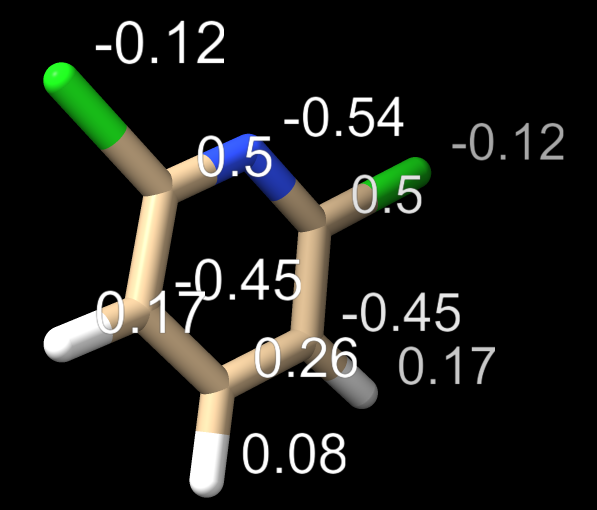

In [14]:
Image(filename='./3DAnnotateExample.png') # OPTIONAL 